

 <h1>  <center> <b> Speech Systems (EE6307) </b> </center>

<dt> <h4> <b> Programming Assignment - 04 : Gaussian Mixture Models (GMM) </b> </h4> </dt>



<dt> <h4>  $\underline{\textbf{Objective}}$:
Welcome to the fourth programming assignment in the speech systems (EE6307) course. The current programming assignment is a prerequisite for building the Automatic Speaker Verification (ASV) with GMM-UBM models. This programming assignment is framed to understand the Gaussian Mixture Models (GMM). This task expects you to code an algorithm to build the GMM models on synthetic data in low dimensional space (2D space). Later, we can extend the framework to speech data in high dimensional space for building the ASV system. In the first part of the programming assignment, you need to generate the synthetic data in 2D space following the multi-modal distribution using Gaussians. In the second part, you need to code the Expectation-Maximization (EM) algorithm from scratch to estimate the parameters of the GMM model for the synthetic data. </h4> </dt>

<dt> <h4>  <b> $\underline{\textbf{Instructions}}$: </b> Please follow these instructions </h4> </dt>
<dd> <h4>  1. Plagiarism is strictly prohibited. </h4> </dd>
<dd> <h4>  2. Delayed submissions will be penalized with a scaling factor of 0.5 per day. </h4> </dd>
<dd> <h4>  3. Please DO NOT use any machine learning libraries unless and otherwise specified. </h4> </dd>







<h4> <b> Part1 (Generating synthetic data) : </b>  This section describes the steps involved in generating the synthetic data.   </h4>

<dt> <h4> 1. Generating synthetic data - Let us consider the GMM with Bivariate Gaussians  </h4> </dt>
<dd> <h4> - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this assignment.   </h4> </dd>
<br>
<dt> <h4> <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>  </h4> </dd>
<br>
<dt> <h4> <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center> </h4> </dd>
<br>
<dt> <h4> <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center> </h4> </dd>
<br>
<dt> <h4> <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center> </h4> </dd>

<dd> <h4> - Pick one Gaussian following the selection probability as  $\pi$   </h4> </dd>
<dd> <h4> - Sample the data point from the selected Bivariate Gaussian distribution   </h4> </dd>
<dd> <h4> - Repeat the process N times to get the entire data set </h4> </dd>
<dt> <h4> 2.Create the synthetic data set with the number of mixtures as 2. </h4> </dt>
<dt> <h4> 3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt>
</h5> </dd>


<ipython-input-1-2d5b9bb87e52>:30: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data_point = np.random.multivariate_normal(mu[gaussian_index], sigma[gaussian_index])


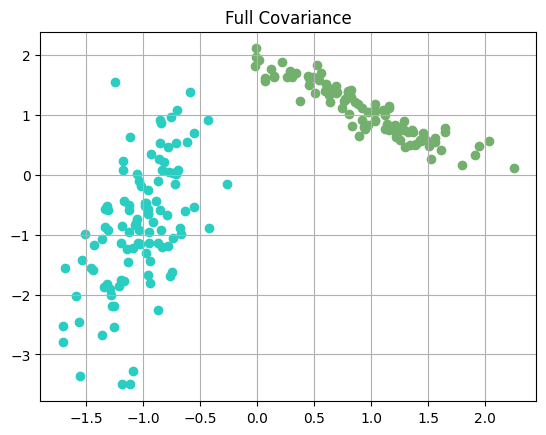

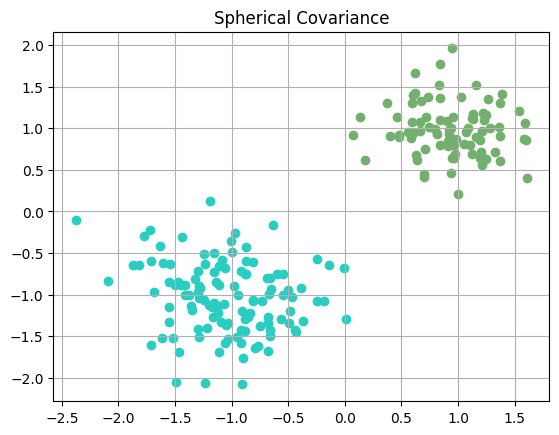

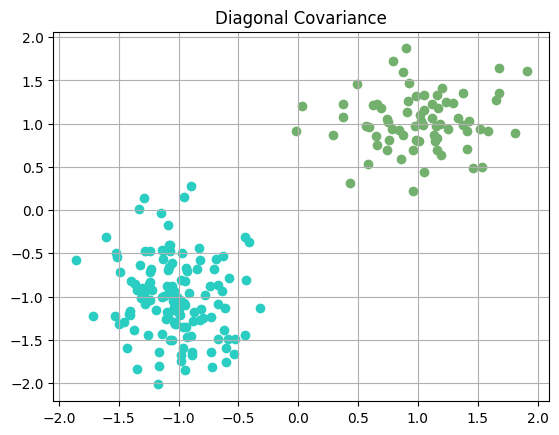

In [1]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math
import random

# np.random.seed(10)

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points
    #Steps
    #1.Select th Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions

    data = None
    gaussian_indexs = np.zeros((N,1))

    for point in range(N):

      gaussian_index = random.choices(range(len(pi)), weights=pi)[0]
      data_point = np.random.multivariate_normal(mu[gaussian_index], sigma[gaussian_index])

      if point == 0:
        data = data_point
      else:
        data = np.vstack((data, data_point))

      gaussian_indexs[point] = gaussian_index

    return data, gaussian_indexs









    ############################################################################


############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 = np.array([-1.0 , -1.0])

sig_full_1 = np.array([[0.15, 1], [0.1, 0.25]])

mu2 = np.array([1.0 , 1.0])
sig_full_2 = np.array([[0.3, -0.25], [-0.25, 0.25]])

pi = [0.6, 0.4]

n_points = 200

sig_diagonal_1 = np.array([[0.1, 0], [0, 0.2]])
sig_diagonal_2 = np.array([[0.2, 0], [0, 0.1]])

sig_spherical_1 = np.array([[0.2, 0], [0, 0.2]])
sig_spherical_2 = np.array([[0.1, 0], [0, 0.1]])




############################################################################
#Create the synthetic data set
############################################################################

full_sig_data, full_sig_gaussian_indexs = generateData(pi, [mu1, mu2], [sig_full_1, sig_full_2], n_points)
spherical_sig_data, spherical_sig_gaussian_indexs = generateData(pi, [mu1, mu2], [sig_spherical_1, sig_spherical_2], n_points)
diagonal_sig_data, diagonal_sig_gaussian_indexs = generateData(pi, [mu1, mu2], [sig_diagonal_1, sig_diagonal_2], n_points)

############################################################################
#Plot the synthetic data set
############################################################################

def assign_colors(elements):
    colors = {}

    # Generate a random color for each element in the list
    for element in elements:
        # Randomly generate an RGB color
        color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        colors[element] = color

    return colors

colors = assign_colors(range(2))

for index, points in enumerate(full_sig_data):

  plt.scatter(points[0], points[1],  color = colors[full_sig_gaussian_indexs[index][0]])

plt.title("Full Covariance")
plt.grid()
plt.show()

for index, points in enumerate(spherical_sig_data):

  plt.scatter(points[0], points[1],  color = colors[spherical_sig_gaussian_indexs[index][0]])

plt.title("Spherical Covariance")
plt.grid()
plt.show()

for index, points in enumerate(diagonal_sig_data):

  plt.scatter(points[0], points[1],  color = colors[diagonal_sig_gaussian_indexs[index][0]])

plt.title("Diagonal Covariance")
plt.grid()
plt.show()

<h4> <b> Part2 (EM algorithm) : </b> This section focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM).   </h4>

<dt> <h4> <b> Implementation of Expectation and Maximization (EM) algorithm
 </b> </h4> </dt>
<dt> <h4> 1. Chose the number of mixtures (M) and initialize the parameters of GMM model </h4> </dt>
<dd> <h4> - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability. </h4> </dd>

<dt> <h4>  2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM </h4> </dt>
<br>
<dd> <h4> <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center> </h4> </dd>
<br>
<dt> <h4>  Where N is the total number of data points and M is the total number of Gaussians in GMM  </h4> </dt>

<dt> <h4>  - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point  </h4> </dt>

<dt> <h4>  - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian  </h4> </dt>


<dt> <h4>  3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood.</h4> </dt>

<dt> <h4>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
</h4> </dt>

<dt> <h4>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
</h4> </dt>

<dt> <h4>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
</h4> </dt>

<dt> <h4>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
</h4> </dt>
<dt> <h4> 4. Compute the log-likelihood with the updated parameters </h4> </dt>
<dt> <h4>  5. Repeat the expectation and maximization steps untill convergence </h4> </dt>

<dt> <h4> <b> Illustration of EM iterations </b> </h4> </dt>

<dt> <h4>  5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points. </h4> </dt>

<dt> <h4> <b> Understanding the issues with EM algorithm </b> </h4> </dt>
<dt> <h4>  6. Check the influence of initialization on the convergence of the EM algorithm and fit quality. </h4> </dt>
<dd> <h4>  - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section   </h4> </dd>
<dt> <h4>  6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </h4> </dt>
<dd> <h4>  - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </h4> </dd>
<dd> <h4>  - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section   </h4> </dd>

In [2]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

def generate_random_psd_matrix(n):

    A = np.random.rand(n, n)  # Random matrix A
    psd_matrix = np.dot(A.T, A)  # Compute A^T A to make it symmetric and PSD
    return psd_matrix

def prob_density(x, mu, sigma):

  prob = multivariate_normal.pdf(x, mean=mu, cov=sigma)

  return prob

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################

def log_likelihood(data, mu, sigma, pi):

  log_likelihood = 0

  for point in data:

    prob = 0

    for gaussian in range(len(pi)):

      prob += pi[gaussian] * prob_density(point, mu[gaussian], sigma[gaussian])

    log_likelihood += np.log(prob)

  return log_likelihood


############################################################################
#Write a function for the expectation step
############################################################################

def Expectation(data, mu, sigma, pi):

  gamma = np.zeros((len(data), len(pi)))

  for point in range(len(data)):

    prob_point = 0

    for gaussian in range(len(pi)):

       prob_point += pi[gaussian] * prob_density(data[point], mu[gaussian], sigma[gaussian])

    for gaussian in range(len(pi)):

      gamma[point][gaussian] = pi[gaussian] * prob_density(data[point], mu[gaussian], sigma[gaussian]) / prob_point


  return gamma




############################################################################
#Write a function for the maximization step.
############################################################################

def Maximization(data, mu, sigma, pi, gamma):

  effective_number_of_points = np.array([0] * len(gamma[0]))
  updated_mean = np.zeros_like(mu)
  updated_covariance = np.zeros_like(sigma)
  updated_pi = np.zeros_like(pi)

  for gaussian in range(len(gamma[0])):

    effective_number_of_points[gaussian] = np.sum(gamma[:, gaussian])

    if effective_number_of_points[gaussian] == 0:
        # If no points are assigned to this Gaussian, handle it appropriately
        # Example: Set mean to previous mean, covariance to identity, or random
        updated_mean[gaussian] = mu[gaussian]  # Retain the previous mean
        updated_covariance[gaussian] = np.eye(data.shape[1])  # Use identity for covariance
        updated_pi[gaussian] = 0.0  # This Gaussian is not used
        continue


    updated_mean[gaussian] = np.dot(gamma[:, gaussian], data) / effective_number_of_points[gaussian]


    updated_covariance[gaussian] = np.dot((gamma[:, gaussian] * (data - updated_mean[gaussian]).T), (data - updated_mean[gaussian])) / effective_number_of_points[gaussian]
    updated_pi[gaussian] = effective_number_of_points[gaussian] / len(data)

  return updated_mean, updated_covariance, updated_pi

############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################

def EM_Algorithm(data, mu, sigma, pi):

  gamma = Expectation(data, mu, sigma, pi)
  # print(gamma)
  updated_mu, updated_sigma, updated_pi = Maximization(data, mu, sigma, pi, gamma)

  return updated_mu, updated_sigma, updated_pi, gamma


In [3]:
import copy

# Initialize the parameters
init_pi = np.random.random((2,))
init_pi = np.exp(init_pi)/sum(np.exp(init_pi)) # to ensure pi's are positive and sum up to 1

init_mu = [np.random.random((2,)) for _ in range(2)]

init_mu_close = copy.deepcopy(init_mu)
init_mu_far = copy.deepcopy(init_mu)

# Make both initialized means close in the same quadrant
if init_mu_close[0][0] < 0:
    init_mu_close[0][0] = init_mu_close[0][0] * -1
if init_mu_close[0][1] < 0:
    init_mu_close[0][1] = init_mu_close[0][1] * -1

if init_mu_close[1][0] < 0:
    init_mu_close[1][0] = init_mu_close[1][0] * -1
if init_mu_close[1][1] < 0:
    init_mu_close[1][1] = init_mu_close[1][1] * -1

# Make means far by placing them in opposite quadrants
if init_mu_far[0][0] < 0:
    init_mu_far[0][0] = init_mu_far[0][0] * -1
if init_mu_far[0][1] < 0:
    init_mu_far[0][1] = init_mu_far[0][1] * -1

if init_mu_far[1][0] > 0:
    init_mu_far[1][0] = init_mu_far[1][0] * -1
if init_mu_far[1][1] > 0:
    init_mu_far[1][1] = init_mu_far[1][1] * -1



init_sig = [generate_random_psd_matrix(2) for _ in range(2)]

<h1> FULL COVARIANCE </h1>

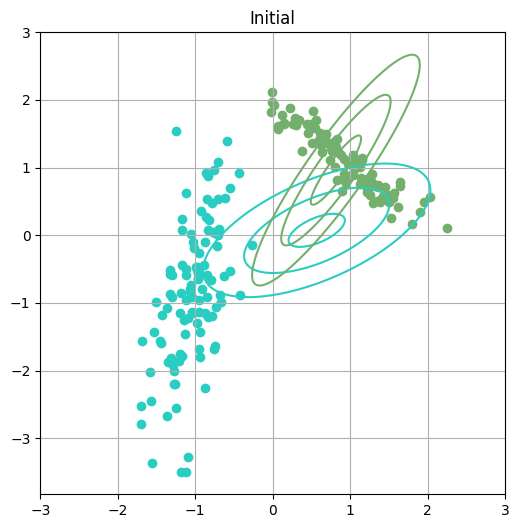

Log-likelihood at iteration - 1: -794.3345325368092


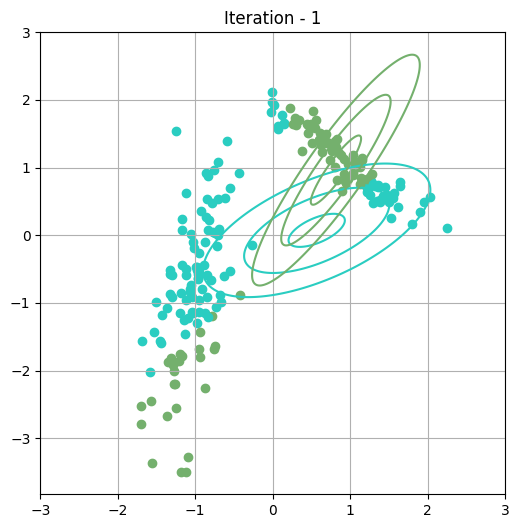

Converged - iteration - 11
Log-likelihood at iteration - 11: -332.6202276101012


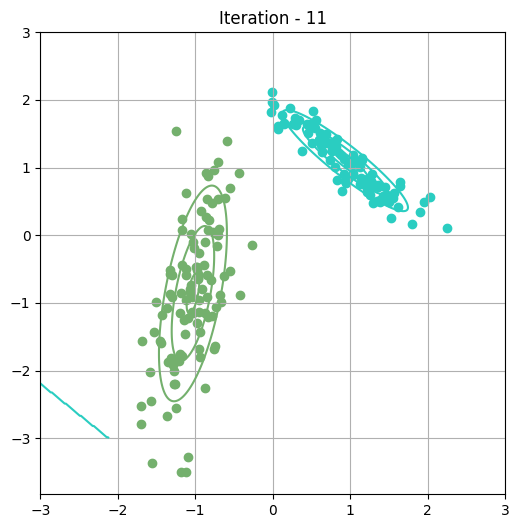

In [4]:
############################################################################
#Illustrate the EM iterations
############################################################################
n_iterations = 50
M = 2

pi = init_pi

mu = init_mu_close

sig = init_sig



plt.figure(figsize=(6,6))  # Create a single figure to hold all plots

for i in range(len(mu)):
    # Create meshgrid and compute the probability density
    x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
    pos = np.dstack((x, y))
    z = prob_density(pos, mu[i], sig[i])

    # Plot the contours for each Gaussian
    plt.contour(x, y, z, levels=3, colors=colors[i])

# Scatter plot for the data points
for index, points in enumerate(full_sig_data):
    plt.scatter(points[0], points[1], color=colors[full_sig_gaussian_indexs[index][0]])

plt.title('Initial')
plt.grid()
plt.show()

log_likelihood_list = [log_likelihood(full_sig_data, mu, sig, pi)]

converged = False

for n in range(n_iterations):

  updated_mu, updated_sig, updated_pi, gamma = EM_Algorithm(full_sig_data, mu, sig, pi)



  log_likelihood_list.append(log_likelihood(full_sig_data, mu, sig, pi))

  if  np.linalg.norm(updated_mu - mu) < 0.01 and np.linalg.norm(updated_sig - sig) < 0.01 and np.linalg.norm(updated_pi - pi) < 0.01:
        print(f"Converged - iteration - {n+1}")
        converged = True


  if n % 10 == 0 or n == n_iterations -1 or converged == True:

    print(f'Log-likelihood at iteration - {n+1}: {log_likelihood(full_sig_data, mu, sig, pi)}')
    plt.figure(figsize=(6,6))  # Create a single figure to hold all plots

    for i in range(len(mu)):
        # Create meshgrid and compute the probability density
        x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
        pos = np.dstack((x, y))
        z = prob_density(pos, mu[i], sig[i])

        # Plot the contours for each Gaussian
        plt.contour(x, y, z, levels=3, colors=colors[i])

    # Scatter plot for the data points
    for index, points in enumerate(full_sig_data):

        if gamma[index][0] > gamma[index][1]:
            plt.scatter(points[0], points[1], color=colors[0])

        else:
            plt.scatter(points[0], points[1], color=colors[1])

    plt.title(f'Iteration - {n+1}')
    plt.grid()
    plt.show()


  mu = updated_mu
  sig = updated_sig
  pi = updated_pi
  if converged == True:
    break

Text(0.5, 1.0, 'Log-likelihood vs Iteration')

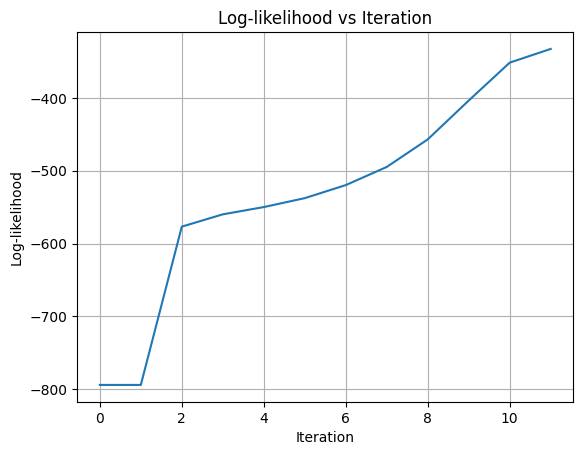

In [5]:
plt.plot(log_likelihood_list)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs Iteration')

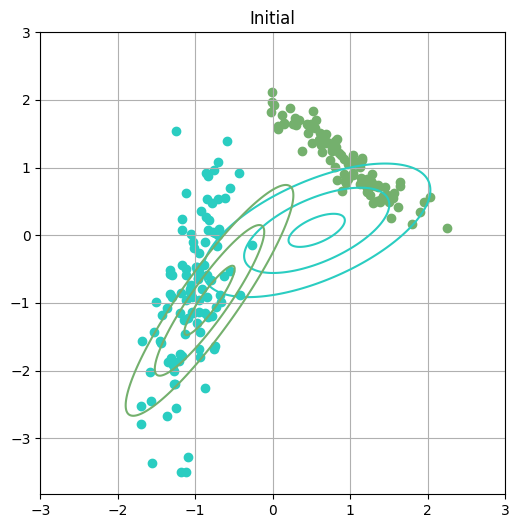

Log-likelihood at iteration - 1: -663.1207035715555


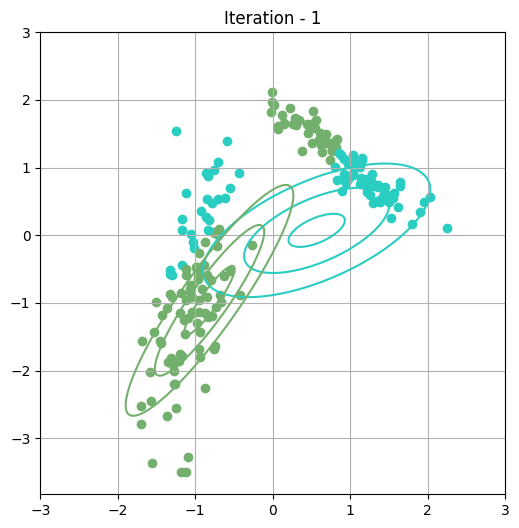

Converged - iteration - 8
Log-likelihood at iteration - 8: -332.5946402580136


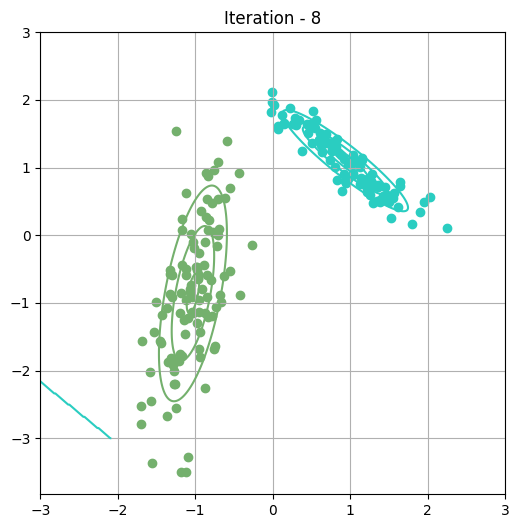

In [6]:
############################################################################
#Illustrate the EM iterations
############################################################################
n_iterations = 50
M = 2

pi = init_pi

mu = init_mu_far

sig = init_sig



plt.figure(figsize=(6,6))  # Create a single figure to hold all plots

for i in range(len(mu)):
    # Create meshgrid and compute the probability density
    x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
    pos = np.dstack((x, y))
    z = prob_density(pos, mu[i], sig[i])

    # Plot the contours for each Gaussian
    plt.contour(x, y, z, levels=3, colors=colors[i])

# Scatter plot for the data points
for index, points in enumerate(full_sig_data):
    plt.scatter(points[0], points[1], color=colors[full_sig_gaussian_indexs[index][0]])

plt.title('Initial')
plt.grid()
plt.show()

log_likelihood_list = [log_likelihood(full_sig_data, mu, sig, pi)]

converged = False

for n in range(n_iterations):

  updated_mu, updated_sig, updated_pi, gamma = EM_Algorithm(full_sig_data, mu, sig, pi)

  if  np.linalg.norm(updated_mu - mu) < 0.01 and np.linalg.norm(updated_sig - sig) < 0.01 and np.linalg.norm(updated_pi - pi) < 0.01:
        print(f"Converged - iteration - {n+1}")
        converged = True


  log_likelihood_list.append(log_likelihood(full_sig_data, mu, sig, pi))

  if n % 10 == 0 or n == n_iterations -1 or converged == True:

    print(f'Log-likelihood at iteration - {n+1}: {log_likelihood(full_sig_data, mu, sig, pi)}')
    plt.figure(figsize=(6,6))  # Create a single figure to hold all plots

    for i in range(len(mu)):
        # Create meshgrid and compute the probability density
        x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
        pos = np.dstack((x, y))
        z = prob_density(pos, mu[i], sig[i])

        # Plot the contours for each Gaussian
        plt.contour(x, y, z, levels=3, colors=colors[i])

    # Scatter plot for the data points
    for index, points in enumerate(full_sig_data):

        if gamma[index][0] > gamma[index][1]:
            plt.scatter(points[0], points[1], color=colors[0])

        else:
            plt.scatter(points[0], points[1], color=colors[1])

    plt.title(f'Iteration - {n+1}')
    plt.grid()
    plt.show()

  mu = updated_mu
  sig = updated_sig
  pi = updated_pi

  if converged == True:
    break

Text(0.5, 1.0, 'Log-likelihood vs Iteration')

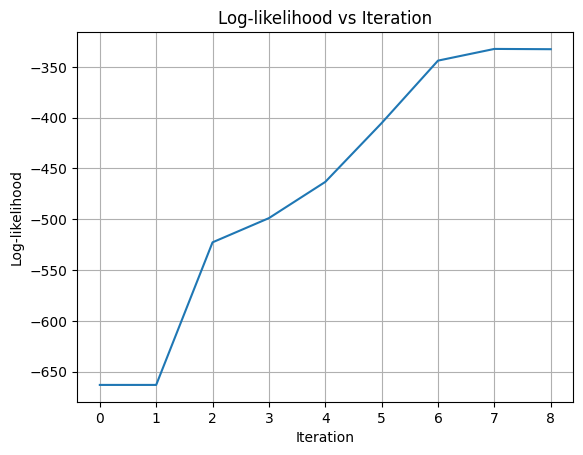

In [7]:
plt.plot(log_likelihood_list)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs Iteration')

<h1> SPHERICAL COVARIANCE</h1>

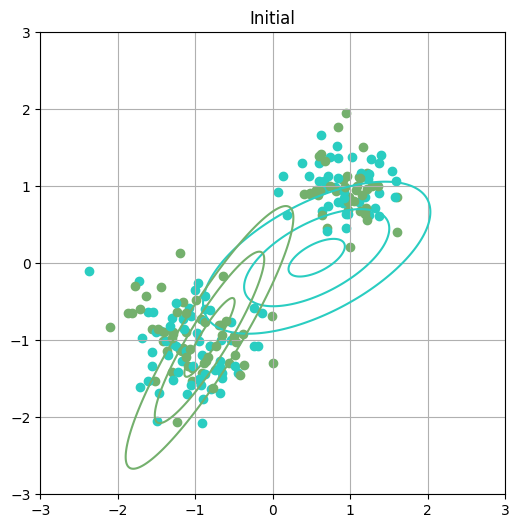

Log-likelihood at iteration - 1: -534.5921490485389


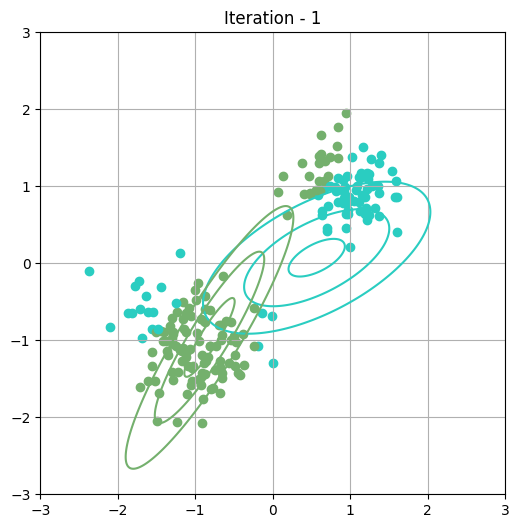

Converged - iteration - 11
Log-likelihood at iteration - 11: -318.98685407790356


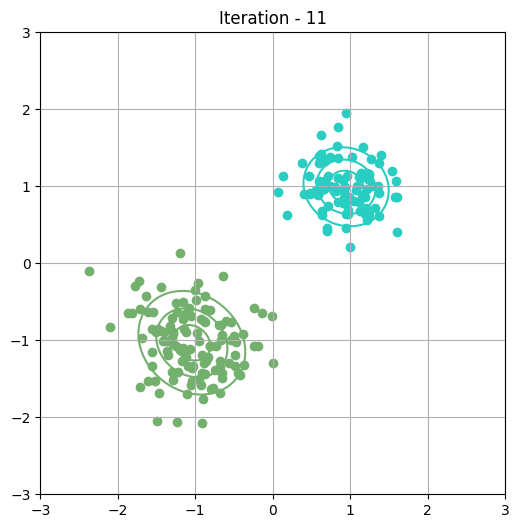

In [8]:
############################################################################
#Illustrate the EM iterations
############################################################################
n_iterations = 50
M = 2

pi = init_pi

mu = init_mu_far

sig = init_sig

plt.figure(figsize=(6,6))  # Create a single figure to hold all plots

for i in range(len(mu)):
    # Create meshgrid and compute the probability density
    x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
    pos = np.dstack((x, y))
    z = prob_density(pos, mu[i], sig[i])

    # Plot the contours for each Gaussian
    plt.contour(x, y, z, levels=3, colors=colors[i])

# Scatter plot for the data points
for index, points in enumerate(spherical_sig_data):
    plt.scatter(points[0], points[1], color=colors[full_sig_gaussian_indexs[index][0]])

plt.title('Initial')
plt.grid()
plt.show()

log_likelihood_list = [log_likelihood(full_sig_data, mu, sig, pi)]

converged = False

for n in range(n_iterations):

  updated_mu, updated_sig, updated_pi, gamma = EM_Algorithm(spherical_sig_data, mu, sig, pi)


  if  np.linalg.norm(updated_mu - mu) < 0.01 and np.linalg.norm(updated_sig - sig) < 0.01 and np.linalg.norm(updated_pi - pi) < 0.01:
        print(f"Converged - iteration - {n+1}")
        converged = True

  log_likelihood_list.append(log_likelihood(spherical_sig_data, mu, sig, pi))

  if n % 10 == 0 or n == n_iterations -1 or converged == True:

    print(f'Log-likelihood at iteration - {n+1}: {log_likelihood(spherical_sig_data, mu, sig, pi)}')
    plt.figure(figsize=(6,6))  # Create a single figure to hold all plots

    for i in range(len(mu)):
        # Create meshgrid and compute the probability density
        x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
        pos = np.dstack((x, y))
        z = prob_density(pos, mu[i], sig[i])

        # Plot the contours for each Gaussian
        plt.contour(x, y, z, levels=3, colors=colors[i])

    # Scatter plot for the data points
    for index, points in enumerate(spherical_sig_data):

        if gamma[index][0] > gamma[index][1]:
            plt.scatter(points[0], points[1], color=colors[0])

        else:
            plt.scatter(points[0], points[1], color=colors[1])

    plt.title(f'Iteration - {n+1}')
    plt.grid()
    plt.show()

  mu = updated_mu
  sig = updated_sig
  pi = updated_pi

  if converged == True:
    break

Text(0.5, 1.0, 'Log-likelihood vs Iteration')

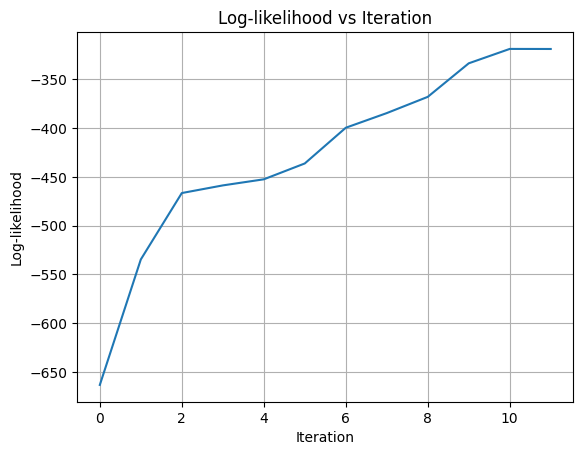

In [9]:
plt.plot(log_likelihood_list)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs Iteration')

<h1> Diagonal Covariance</h1>

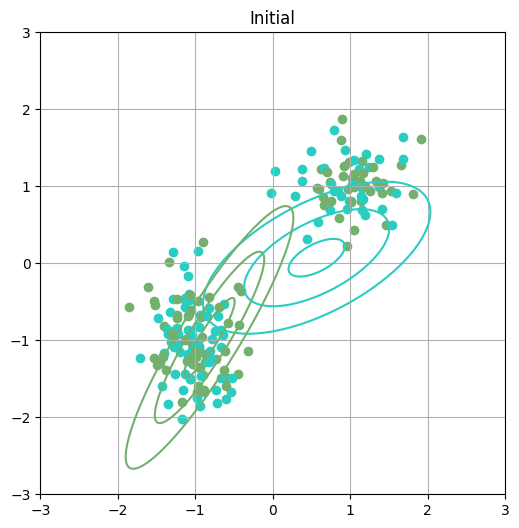

Log-likelihood at iteration - 1: -501.530948575777


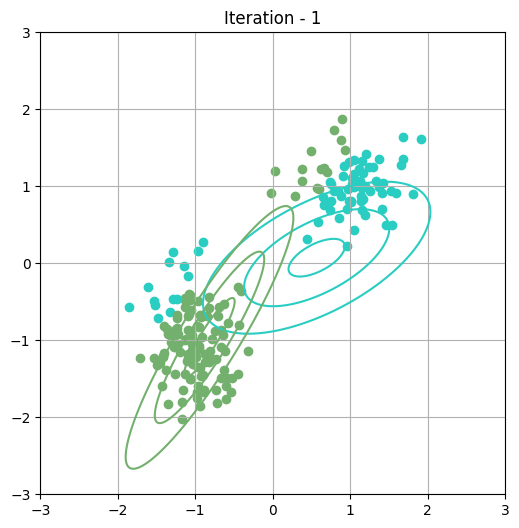

Converged - iteration - 8
Log-likelihood at iteration - 8: -287.44677431195265


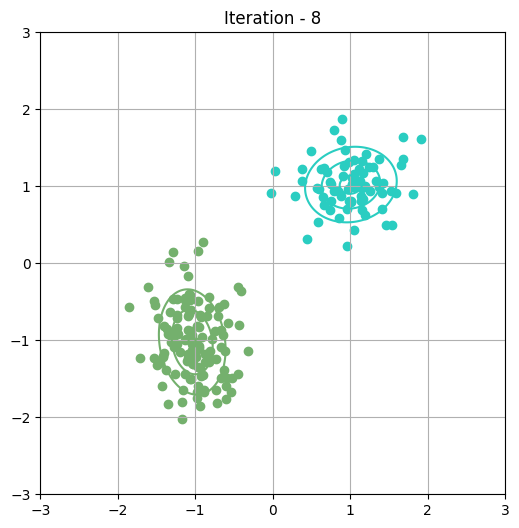

In [10]:
n_iterations = 50
M = 2

pi = init_pi

mu = init_mu_far

sig = init_sig



plt.figure(figsize=(6,6))  # Create a single figure to hold all plots

for i in range(len(mu)):
    # Create meshgrid and compute the probability density
    x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
    pos = np.dstack((x, y))
    z = prob_density(pos, mu[i], sig[i])

    # Plot the contours for each Gaussian
    plt.contour(x, y, z, levels=3, colors=colors[i])

# Scatter plot for the data points
for index, points in enumerate(diagonal_sig_data):
    plt.scatter(points[0], points[1], color=colors[full_sig_gaussian_indexs[index][0]])

plt.title('Initial')
plt.grid()
plt.show()

log_likelihood_list = [log_likelihood(full_sig_data, mu, sig, pi)]
converged = False

for n in range(n_iterations):

  updated_mu, updated_sig, updated_pi, gamma = EM_Algorithm(diagonal_sig_data, mu, sig, pi)


  log_likelihood_list.append(log_likelihood(diagonal_sig_data, mu, sig, pi))

  if  np.linalg.norm(updated_mu - mu) < 0.01 and np.linalg.norm(updated_sig - sig) < 0.01 and np.linalg.norm(updated_pi - pi) < 0.01:
        print(f"Converged - iteration - {n+1}")
        converged = True

  if n % 10 == 0 or n == n_iterations -1 or converged == True:

    print(f'Log-likelihood at iteration - {n+1}: {log_likelihood(diagonal_sig_data, mu, sig, pi)}')
    plt.figure(figsize=(6,6))  # Create a single figure to hold all plots

    for i in range(len(mu)):
        # Create meshgrid and compute the probability density
        x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
        pos = np.dstack((x, y))
        z = prob_density(pos, mu[i], sig[i])

        # Plot the contours for each Gaussian
        plt.contour(x, y, z, levels=3, colors=colors[i])

    # Scatter plot for the data points
    for index, points in enumerate(diagonal_sig_data):

        if gamma[index][0] > gamma[index][1]:
            plt.scatter(points[0], points[1], color=colors[0])

        else:
            plt.scatter(points[0], points[1], color=colors[1])

    plt.title(f'Iteration - {n+1}')
    plt.grid()
    plt.show()

  mu = updated_mu
  sig = updated_sig
  pi = updated_pi

  if converged ==True:
    break

Text(0.5, 1.0, 'Log-likelihood vs Iteration')

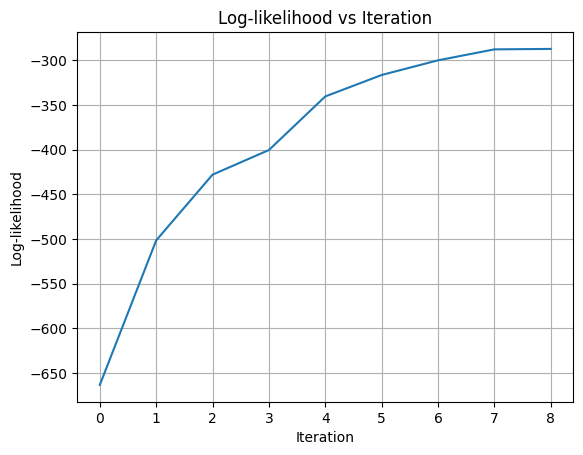

In [11]:
plt.plot(log_likelihood_list)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs Iteration')

<h4> <b> Report of the assignment : </b>  
Write down your observations on expectation and maximization algorithm


<dt> <h4> 1. Convergence when means are initialised farther is faster usually. </h4> </dt>
<dt> <h4> 2. Convergence rates and fit quality are dependent on initialization </h4> </dt>
<dt> <h4> 3.  The EM algorithm can sometimes converge where the covariance matrix of a mixture component is singular and the log-likelihood is infinite, so we have to re-run with different initializations.    </h4> </dt>
<dt> <h4> 4. Sometimes EM algorithm gets stuck in a local maxima, similarly we have to run with different initiliazations</h4> </dt>
